In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./data/kickstarter.csv')
data

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [34]:
def items_in_category(df, category, state, is_main_category):
    if is_main_category:
        temp = df[(df.main_category == category) & (df.state == state)]
    else:
        temp = df[(df.category == category) & (df.state == state)]
    series = temp['state'].value_counts()
    return series.at[state]

In [35]:
main_categories = data["main_category"].values
main_categories = np.unique(main_categories)
main_categories = pd.Series(data=main_categories)

games = ["Tabletop Games", "Video Games"]
games = pd.Series(data=games)

categories = pd.concat([main_categories, games], ignore_index=True)
categories

0                Art
1             Comics
2             Crafts
3              Dance
4             Design
5            Fashion
6       Film & Video
7               Food
8              Games
9         Journalism
10             Music
11       Photography
12        Publishing
13        Technology
14           Theater
15    Tabletop Games
16       Video Games
dtype: object

In [36]:
df_minus_video_tabletop = data[(data.category != "Tabletop Games") & (data.category != "Video Games")]

categories_df = pd.DataFrame(columns=['attained_goal', 'undershot_goal', 'canceled'])
categories_df.insert(loc=0, column='main_category', value=main_categories)

games_df = pd.DataFrame(columns=['attained_goal', 'undershot_goal', 'canceled'])
games_df.insert(loc=0, column='main_category', value=games)

for main_category in main_categories:
    categories_df.loc[categories_df['main_category'] == main_category, 'attained_goal'] = items_in_category(df_minus_video_tabletop, main_category, 'successful', True)
    categories_df.loc[categories_df['main_category'] == main_category, 'undershot_goal'] = items_in_category(df_minus_video_tabletop, main_category, 'failed', True)
    categories_df.loc[categories_df['main_category'] == main_category, 'canceled'] = items_in_category(df_minus_video_tabletop, main_category, 'canceled', True)

for game in games:
    games_df.loc[games_df['main_category'] == game, 'attained_goal'] = items_in_category(data, game, 'successful', False)
    games_df.loc[games_df['main_category'] == game, 'undershot_goal'] = items_in_category(data, game, 'failed', False)
    games_df.loc[games_df['main_category'] == game, 'canceled'] = items_in_category(data, game, 'canceled', False)

categories_df = categories_df.append(games_df, ignore_index=True)

# Create new column for total number of projects
categories_df['total_projects'] = categories_df.apply(lambda row: row.attained_goal + row.undershot_goal + row.canceled, axis=1)

# Create new column for success ratio
categories_df['success_ratio'] = categories_df.apply(lambda row: (row.attained_goal) / (row.undershot_goal + row.canceled), axis=1)

# Sort by success ratio
categories_df = categories_df.sort_values('success_ratio', ascending=False)

# Change "Games" label for "Other Games"
categories_df.loc[8, 'main_category'] = "Other Games"
categories_df

,main_category,attained_goal,undershot_goal,canceled,total_projects,success_ratio
3,Dance,2338,1235,163,3736,1.672389
14,Theater,6534,3708,608,10850,1.513902
15,Tabletop Games,7866,3878,2294,14038,1.274465
1,Comics,5842,4036,842,10720,1.197622
10,Music,24197,21752,3305,49254,0.965678
0,Art,11510,14131,2222,27863,0.703846
6,Film & Video,23623,32904,5755,62282,0.611061
4,Design,10550,14814,4152,29516,0.556259
12,Publishing,12300,23145,3602,39047,0.459865
11,Photography,3305,6384,986,10675,0.448440


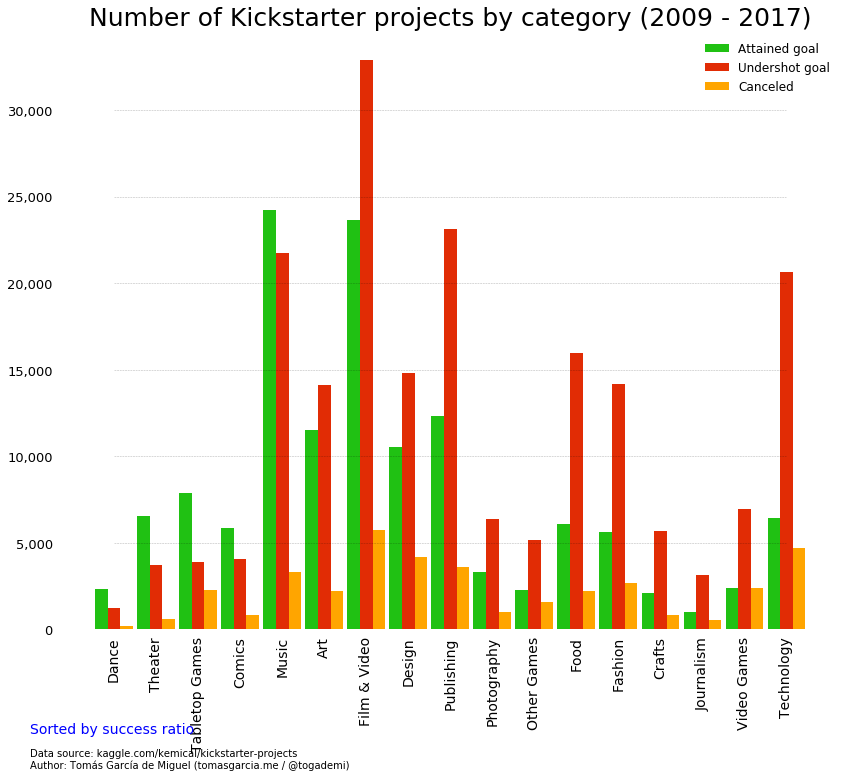

In [37]:
x = np.arange(categories.size)
fig, ax = plt.subplots()

width = 0.3
plt.xticks(x, categories_df.main_category, rotation='vertical', fontsize=14)

attained_goal = ax.bar(x - width, categories_df.attained_goal, width, color="#20C113")
undershot_goal = ax.bar(x, categories_df.undershot_goal, width, color="#E12C05")
canceled = ax.bar(x + width, categories_df.canceled, width, color="orange")

plt.title("Number of Kickstarter projects by category (2009 - 2017)", fontsize=25)
plt.yticks(fontsize=13)
plt.legend([attained_goal, undershot_goal, canceled], ["Attained goal", "Undershot goal", "Canceled"], 
           fontsize=12, frameon=False)

# Place a thousands separator in the labels of the y axis
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Remove the plot frame lines
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

# Provide tick lines across the plot
for y in range(5000, 35000, 5000):
    plt.plot(range(17), [y] * 17, "--", lw=0.5, color="black", alpha=0.3)

# Remove the tick marks    
plt.tick_params(axis="both", which="both", top=False, 
                left=False, bottom=False, right=False, labelleft=True)

# Change size of graph
fig.set_size_inches(14, 11)

plt.text(-2, -6000, "Sorted by success ratio", fontsize=14, color="blue")

plt.text(-2, -8000, "Data source: kaggle.com/kemical/kickstarter-projects"    
       "\nAuthor: Tomás García de Miguel (tomasgarcia.me / @togademi)", fontsize=10)

figure = plt.gcf()
plt.savefig('graph.png', dpi=300, bbox_inches="tight")
plt.show()

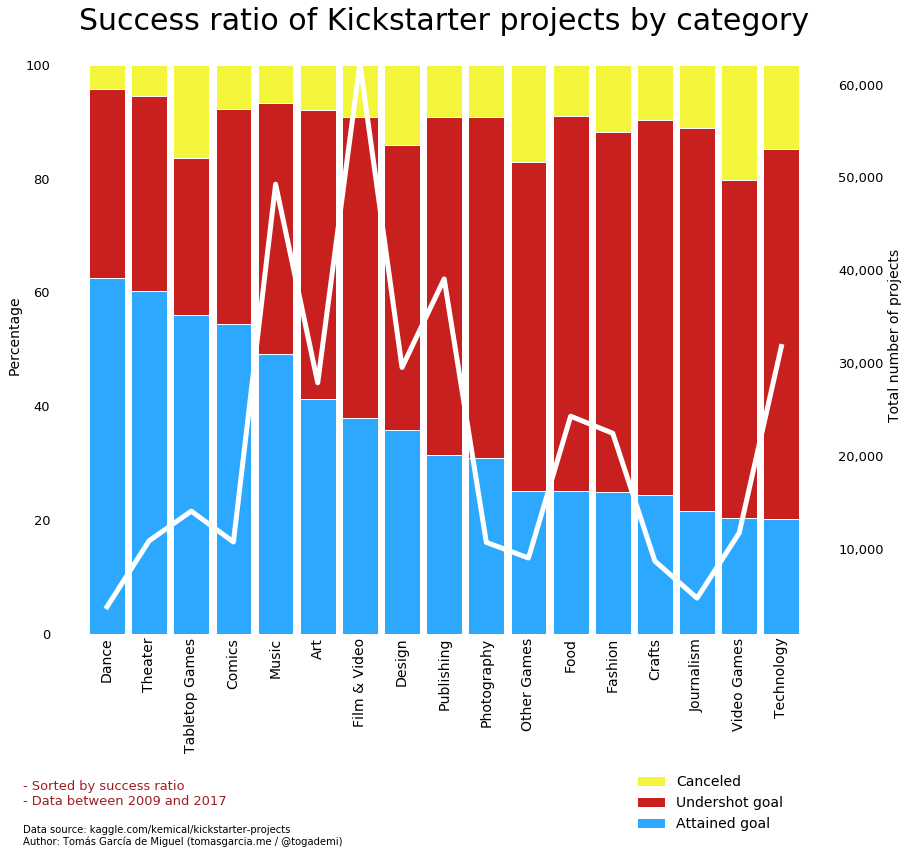

In [38]:
# Data

x = np.arange(categories.size)

width = 0.85

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(categories_df['attained_goal'], categories_df['undershot_goal'], categories_df['canceled'])]
attained_goal = [i / j * 100 for i,j in zip(categories_df['attained_goal'], totals)]
undershot_goal = [i / j * 100 for i,j in zip(categories_df['undershot_goal'], totals)]
canceled = [i / j * 100 for i,j in zip(categories_df['canceled'], totals)]

# Plot bar graph

fig, ax = plt.subplots()

attained_goal_ax = ax.bar(x, attained_goal, width, color='#2CA9FF', edgecolor='white')
undershot_goal_ax = ax.bar(x, undershot_goal, width, bottom=attained_goal, color='#C81F1F', edgecolor='white')
canceled_ax = ax.bar(x, canceled, width, bottom=[i+j for i,j in zip(attained_goal, undershot_goal)], 
                     color='#F3F53B', edgecolor='white')

# Custom bar graph

# Remove the tick marks
plt.tick_params(axis="both", which="both", top=False, 
                left=False, bottom=False, right=False, labelleft=True)

plt.ylabel("Percentage", fontsize=14)
plt.xticks(x, categories_df.main_category, rotation='vertical', fontsize=14)
plt.title("Success ratio of Kickstarter projects by category", fontsize=30)
plt.yticks(fontsize=13)
plt.legend([canceled_ax, undershot_goal_ax, attained_goal_ax], ["Canceled", "Undershot goal", "Attained goal"], 
           fontsize=14, frameon=False, loc='lower right', bbox_to_anchor=(0.95, -0.35))
ax.tick_params(length=0)


# Remove the plot frame lines
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# Change size of graph
fig.set_size_inches(14, 11)

plt.text(-2, -30, "- Sorted by success ratio"
         "\n- Data between 2009 and 2017", fontsize=13, color="#A01E1E")

plt.text(-2, -37, "Data source: kaggle.com/kemical/kickstarter-projects"
       "\nAuthor: Tomás García de Miguel (tomasgarcia.me / @togademi)", fontsize=10)

# Plot line graph

ax2 = ax.twinx()
total_projects = ax2.plot(x, categories_df["total_projects"], lw=5, color="white")
plt.ylabel("Total number of projects", fontsize=14)

# Custom line graph

# Place a thousands separator in the labels of the y axis
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.yticks(fontsize=13)
ax2.tick_params(length=0)

# Remove the plot frame lines
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)

figure = plt.gcf()
plt.savefig('ks_success_ratio.png', dpi=300, bbox_inches="tight")
plt.show()